In [2]:
import warnings
warnings.filterwarnings("ignore")
import pyart
import numpy as np
import os
import glob
import datetime
import pymeso.vortex
from pymeso import llsd
import wradlib as wrl
import matplotlib.pyplot as plt


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [19]:
data_dir = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KBMX/KBMX20220323_021233_V06.nc"

In [20]:
radar = pyart.io.read(data_dir)

In [21]:
display = pyart.graph.RadarDisplay(radar)

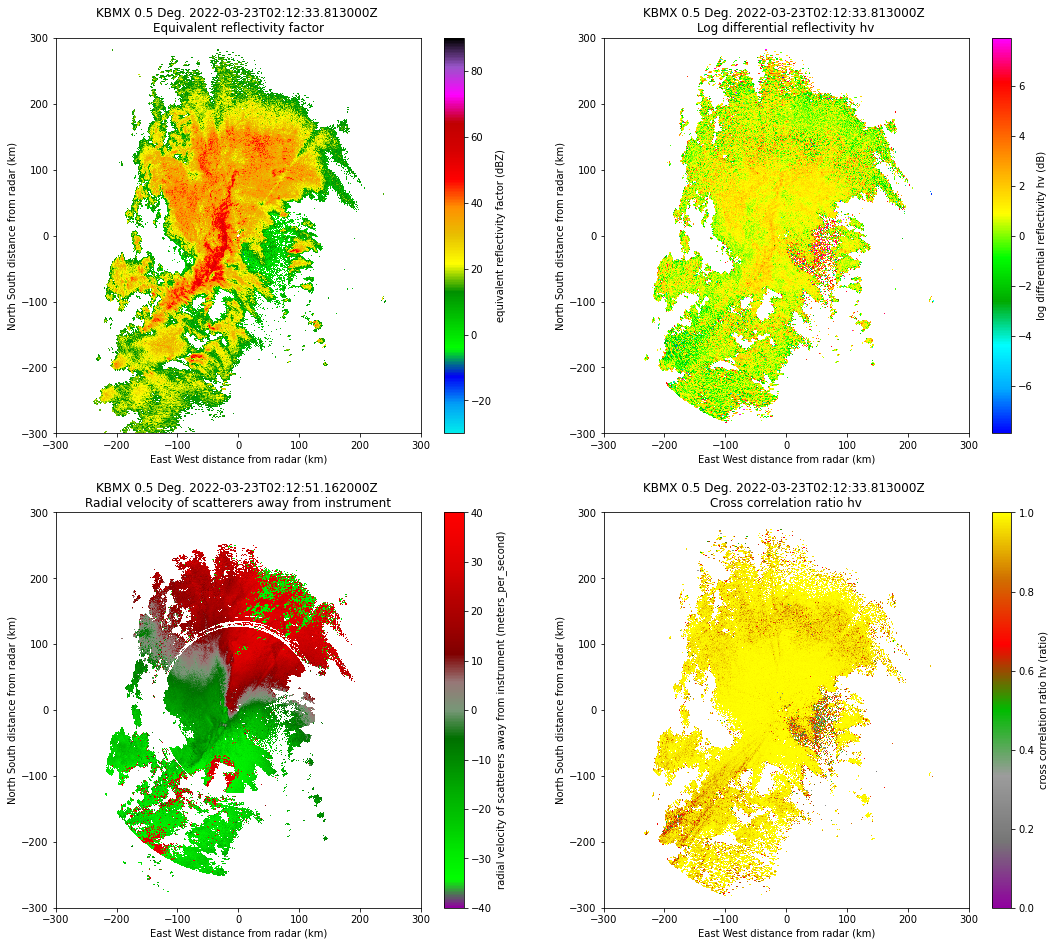

In [23]:
fig = plt.figure(figsize=[18,16])
ax1 = plt.subplot(221)
display.plot_ppi("reflectivity",sweep=0,vmin=-30,vmax=90, cmap="pyart_NWSRef", ax=ax1)
ax2 = plt.subplot(222)
display.plot("differential_reflectivity",sweep=0,vmin=-7.9,vmax=7.9, cmap="pyart_RefDiff", 
                     ax=ax2)
ax3 = plt.subplot(223)
display.plot("velocity",sweep=1,vmin=-40,vmax=40, cmap="pyart_NWSVel",ax=ax3)
ax4 = plt.subplot(224)
display.plot("cross_correlation_ratio",sweep=0,vmin=0,vmax=1, cmap="pyart_NWS_SPW",ax=ax4)
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(-300, 300)
    ax.set_ylim(-300, 300)

![Image_1](http://catalog.eol.ucar.edu/perils_2022/radar/bmx-nexrad/20220323/02/radar.BMX-NEXRAD.202203230208.DBZ.gif)

In [24]:
radar.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': masked_array(data=[ 0.48339844,  0.48339844,  0.87890625,  0.87890625,
                     0.48339844,  0.48339844,  1.3183594 ,  1.3183594 ,
                     1.8017578 ,  2.4169922 ,  0.48339844,  0.48339844,
                     3.1201172 ,  3.9990234 ,  5.0976562 ,  6.4160156 ,
                     0.48339844,  0.48339844,  7.998047  , 10.019531  ,
                    12.480469  , 15.600586  , 19.511719  ],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

In [25]:
radar.nsweeps

23

In [26]:
radar.sweep_mode

{'long_name': 'Sweep mode',
 'units': 'unitless',
 'standard_name': 'sweep_mode',
 'comment': 'Options are: "sector", "coplane", "rhi", "vertical_pointing", "idle", "azimuth_surveillance", "elevation_surveillance", "sunscan", "pointing", "manual_ppi", "manual_rhi"',
 'data': masked_array(
   data=[[b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l

In [27]:
##################
#Example of running and plotting of llsd function from PyMeso
##################
#import standard libs
import time
from pymeso import llsd
from matplotlib.pyplot import cm
import matplotlib.colors as colors

#function to dealiase the Doppler velocity
def dealiase(radar, vel_name):
    #check to see if radar object has nyquist velocity
    try: 
        gatefilter = pyart.correct.GateFilter(radar)
        corr_vel   = pyart.correct.dealias_region_based(
            radar, vel_field=vel_name, keep_original=False, gatefilter = gatefilter)
        radar.add_field(vel_name, corr_vel, True)
    except:
        None
#dealiase Doppler field
dealiase(radar,'velocity')

#call the llsd function form llsd.py
start_time = time.time()
az_shear_meta = llsd.main(radar,'reflectivity','velocity')
print("LLSD COMPUTE --- %s seconds ---" % (time.time() - start_time))
radar.add_field('azi_shear', az_shear_meta, replace_existing=True)

#define constants as required for plotting
tilt = 1

#plot reflectivity, Doppler velocity and llsd azimuthal shear using pyart
display = pyart.graph.RadarDisplay(radar)

/home/syed44/.conda/envs/cent7/2020.11-py38/syed/lib/python3.9/site-packages/pymeso/llsd.py:27: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  smooth_data    = scipy.ndimage.filters.median_filter(data, 3)


LLSD COMPUTE --- 4.430813550949097 seconds ---


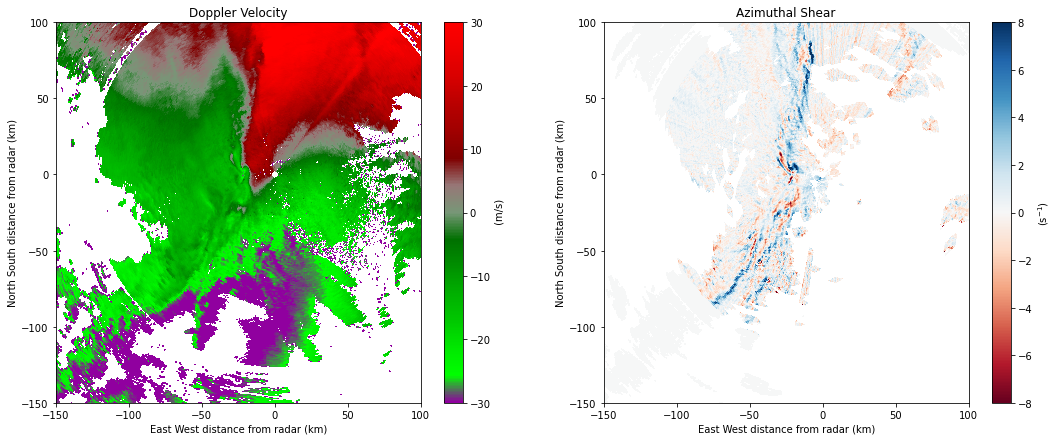

In [28]:
f = plt.figure(figsize=[18,7])
ax1 = plt.subplot(121)
display.plot('velocity', tilt, title='Doppler Velocity',vmin=-30, vmax=30.0, colorbar_label=' (m/s)',
                       cmap = pyart.graph.cm.NWSVel,ax=ax1)
ax2 = plt.subplot(122)
display.plot('azi_shear',tilt,title='Azimuthal Shear',vmin=-8, vmax=8, colorbar_label='(s$^{-1}$)',
                       cmap=cm.RdBu,ax=ax2)
for ax in [ax1,ax2]:
    ax.set_xlim(-150, 100)
    ax.set_ylim(-150, 100)

In [12]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	units: meters
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (12600,)>
	long_name: azimuth_angle_from_true_north
	units: degrees
	standard_name: beam_azimuth_angle
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (12600,)>
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	standard_name: beam_elevation_angle
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (12600, 1832)>
		_FillValue: -9999.0
		long_name: differential_phase_hv
		units: degrees
		standard_name: differential_phase_hv
		valid_max: 360.0
		valid_min: 0.0
		coordinates: elevation azimuth range
	reflectivity:
		data: <ndarray of t

In [13]:
data_dir

'/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KBMX/KBMX20220323_015242_V06.nc'

In [29]:
radar2 = pyart.io.read("/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KBMX/KBMX20220331_014132_V06.nc")

In [15]:
display2 = pyart.graph.RadarDisplay(radar2)

In [16]:
radar2.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': masked_array(data=[ 0.48339844,  0.48339844,  0.87890625,  0.87890625,
                     0.48339844,  0.48339844,  1.3183594 ,  1.3183594 ,
                     1.8017578 ,  0.48339844,  0.48339844,  2.4169922 ,
                     3.1201172 ,  3.9990234 ,  5.0976562 ,  6.4160156 ,
                     0.48339844,  0.48339844,  7.998047  , 10.019531  ,
                    12.480469  , 15.600586  , 19.511719  ],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

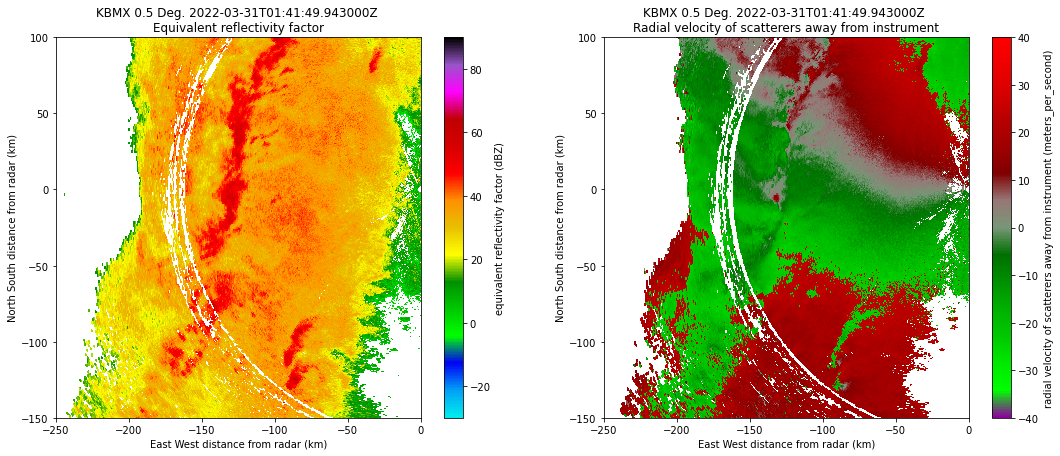

In [35]:
tilt = 1
fig = plt.figure(figsize=[18,7])
ax1 = plt.subplot(121)
display2.plot_ppi("reflectivity",sweep=tilt,vmin=-30,vmax=90, cmap="pyart_NWSRef", ax=ax1)
ax2 = plt.subplot(122)
display2.plot("velocity",sweep=tilt,vmin=-40,vmax=40, cmap="pyart_NWSVel",ax=ax2)
for ax in [ax1,ax2]:
    ax.set_xlim(-250, 0)
    ax.set_ylim(-150, 100)

In [30]:
dealiase(radar2,'velocity')

#call the llsd function form llsd.py
start_time = time.time()
az_shear_meta = llsd.main(radar2,'reflectivity','velocity')
print("LLSD COMPUTE --- %s seconds ---" % (time.time() - start_time))
radar2.add_field('azi_shear', az_shear_meta, replace_existing=True)

#define constants as required for plotting
tilt = 1

#plot reflectivity, Doppler velocity and llsd azimuthal shear using pyart
display3 = pyart.graph.RadarDisplay(radar2)

/home/syed44/.conda/envs/cent7/2020.11-py38/syed/lib/python3.9/site-packages/pymeso/llsd.py:27: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  smooth_data    = scipy.ndimage.filters.median_filter(data, 3)


LLSD COMPUTE --- 4.1932737827301025 seconds ---


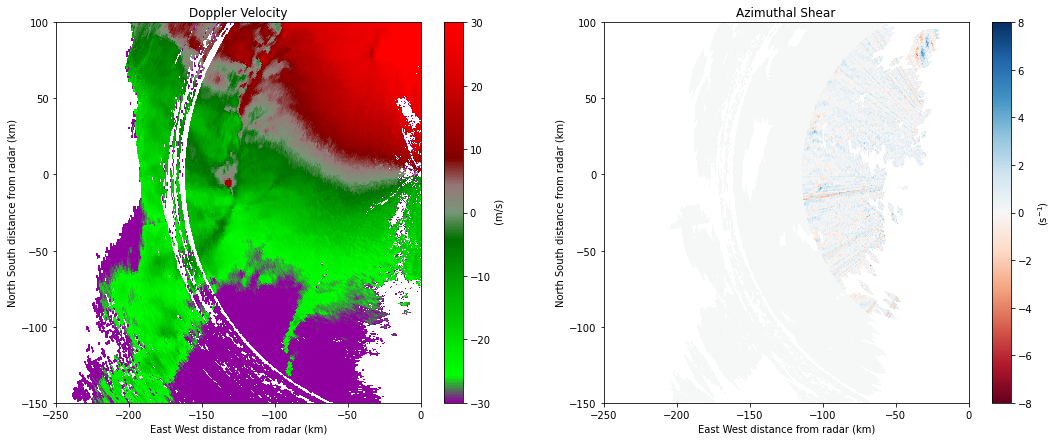

In [34]:
f = plt.figure(figsize=[18,7])
ax1 = plt.subplot(121)
display3.plot('velocity', tilt, title='Doppler Velocity',vmin=-30, vmax=30.0, colorbar_label=' (m/s)',
                       cmap = pyart.graph.cm.NWSVel,ax=ax1)
ax2 = plt.subplot(122)
display3.plot('azi_shear',tilt,title='Azimuthal Shear',vmin=-8, vmax=8, colorbar_label='(s$^{-1}$)',
                       cmap=cm.RdBu,ax=ax2)
for ax in [ax1,ax2]:
    ax.set_xlim(-250, 0)
    ax.set_ylim(-150, 100)

![Image_KBMX](http://catalog.eol.ucar.edu/perils_2022/radar/bmx-nexrad/20220331/01/radar.BMX-NEXRAD.202203310142.DBZ.gif)